In [77]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [78]:
os.chdir("/Users/JKovach/Downloads")
sen_raw = pd.read_csv('./sentiment labelled sentences/yelp_labelled.txt', delimiter='\t', header=None)
sen_raw.columns = ['message', 'positive']
sen_raw.head()

,message,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


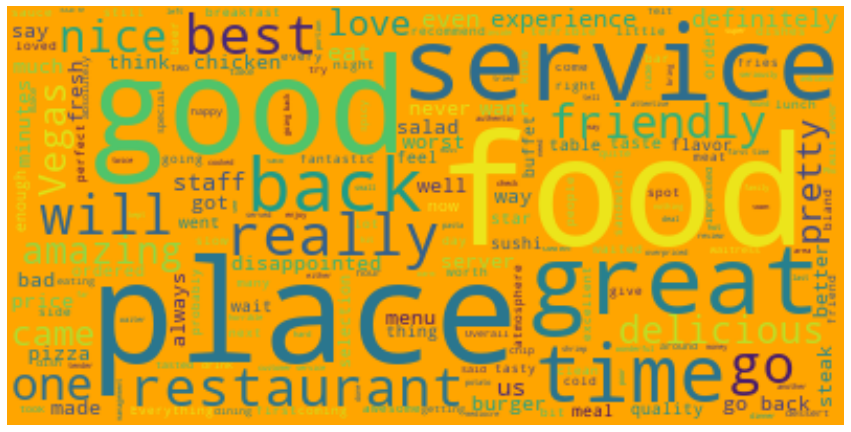

In [79]:
# Using Wordcloud to determine n
from wordcloud import WordCloud

wc = WordCloud(background_color='orange').generate(''.join(sen_raw['message']))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()

In [80]:
keywords = ['nasty', 'wait', 'bad', 'cold', 'never', 'disappointed']

for key in keywords:
    sen_raw[str(key)] = sen_raw.message.str.contains(
        " " + str(key) + " ",
        case=False
    )

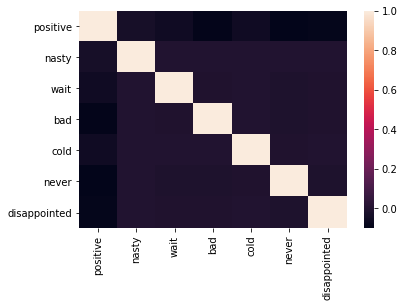

In [81]:
sns.heatmap(sen_raw.corr())

In [82]:
sen_raw['positive'] = (sen_raw['positive']==1)

In [83]:
data = sen_raw[keywords]
target = sen_raw['positive']

In [88]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points: 460


In [89]:
sen_raw.head(30)

,message,positive,nasty,wait,bad,cold,never,disappointed
0,Wow... Loved this place.,True,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False
5,Now I am getting angry and I want my damn pho.,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),False,False,False,False,False,False,False
7,The potatoes were like rubber and you could te...,False,False,False,False,False,False,False
8,The fries were great too.,True,False,False,False,False,False,False
9,A great touch.,True,False,False,False,False,False,False
